# Notebook to show Comments Summaries

In [2]:
# Change working directory to be project root
import os
#os.chdir("..")
os.getcwd()

'C:\\Users\\payla\\Documents\\MDS\\Capstone\\DSCI_591_capstone-BCStats'

In [3]:
# ensure packages reload after every change 
%load_ext autoreload
%autoreload 2


import pandas as pd
import numpy as np
import re
import time

import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

import string
import networkx as nx

import src

from src.data.preprocessing_text import clean_text
from src.data.preprocessing_text import replace_typical_misspell
from src.data.preprocessing_text import remove_stopwords
from src.text_summary import *

from sklearn.metrics.pairwise import cosine_similarity

In [4]:
# read in data about subthemes
df = pd.read_csv(".\data\interim\joined_qual_quant.csv")
df.head(3)

,USERID,code,qual_value,quan_value,question,diff,text
0,175125-215928,43,-1,-1,Q63,0,The problem with the BCSS is Linda Cavanaugh a...
1,175125-215928,43,-1,-1,Q65,0,The problem with the BCSS is Linda Cavanaugh a...
2,191202-862188,102,-1,-1,Q39,0,"Improved office space (fix HVAC, etc) but NO LWS"


In [5]:
# filter to a specific subtheme and diff
df_43_0 = df[(df['code'] == 43) & (df['diff'] == 0)]
df_43_2 = df[(df['code'] == 43) & (df['diff'] == 2)]

In [6]:
# drop any duplicate text values
df_43_0 = df_43_0.drop_duplicates(subset=['text'])
df_43_2 = df_43_2.drop_duplicates(subset=['text'])
df_all = df.drop_duplicates(subset=['text'])

In [8]:
corpus_43_0 = src.text_summary.comment_to_corpus(df_43_0, 'text')
corpus_43_2 = src.text_summary.comment_to_corpus(df_43_2, 'text')
corpus_all = src.text_summary.comment_to_corpus(df_all, 'text')

In [ ]:
corpus_43_0 = src.text_summary.corpus_prep_sentences(corpus_43_0)
corpus_43_2 = src.text_summary.corpus_prep_sentences(corpus_43_2)
corpus_all = src.text_summary.corpus_prep_sentences(corpus_all)

In [ ]:
# tokenize into sentences 
sentences_43_0 = nltk.sent_tokenize(corpus_43_0)
sentences_43_2 = nltk.sent_tokenize(corpus_43_2)
sentences_all = nltk.sent_tokenize(corpus_all)

## Word and Sentence EDA for Subtheme 43 Agreement None
<br>

In [ ]:
src.text_summary.sentence_eda(sentences_43_2, word_plot=True, character_plot=True)

## Word and Sentence EDA for All Comments

<br>

In [ ]:
src.text_summary.sentence_eda(sentences_all, word_plot=True, character_plot=True)

## Pre-processing
<br>

In [ ]:
processed_43_0 = src.text_summary.pre_processing(sentences_43_0)
processed_43_2 = src.text_summary.pre_processing(sentences_43_2)
processed_all = src.text_summary.pre_processing(sentences_all)

In [ ]:
count = 0
for i in processed_all:
    print(count)
    print(i, "\n")
    count += 1

## Summaries
<br>

In [ ]:
start = time.time()
summary_for_43_0 = src.text_summary.summary_textrank(sentences_43_0, processed_43_0, 10)
end = time.time()
print((end - start) / 60, "mins")

In [ ]:
print("Summary for Strengthen quality of executive leadership - Strong Agreement")
print("--------------------------------------------------------------------------")
for i in summary_for_43_0:
    print(i, "\n")

In [ ]:
start = time.time()
summary_for_43_2 = src.text_summary.summary_textrank(sentences_43_2, processed_43_2, 10)
end = time.time()
print((end - start) / 60, "mins")

In [ ]:
print("Summary for Strengthen quality of executive leadership - No Agreement")
print("----------------------------------------------------------- ---------")
for i in summary_for_43_2:
    print(i, "\n")

## Notes

- summary seems decent interms of groups
- wondering more how it functions, are these sentences all from different comments? how does it put them together
    - they are 1 sententence, they are long because of how long the comments are and the splitting didn't work perfectly
    - try the tweettokenizer which deals with "messy" text better
    -  split on ;
    - maybe split on , because there are lots of really long sentences that if split on the comma would be better phrases
    - also no splitting if there is no space after the .
        - clean this by adding space after any . and then removing double spaces
    - also 1 sentence 
- where are the capitals coming from? they were all removed along with stop words and puncution so how did it appear?
    - appears it is taking the text from its tokenized stage compared to the preprocessed version
- overall is decent and doesn't take too long
    - need to work on tokenization

## Current plan/steps

- try a few different algorthms, appears to be a lot of different implementations present
- try extrative summaries compared to abstractive

- fasttext crawl & glove crawl
    - switch to embedding that has better coverage (need to download when at home)
    - watch how it is preprocessed some are different ie all lower case, replace numbers with number signs etc
  
- **need to remove sensitive comment or replace with "John Doe" b/c extractive summaries use real sentences**

- do some sentence EDA
    - most common words (may want to lemitize first)
    - for exective maybe look at most common acroynms (like ADM, etc)
    
- look in aarons classification model
    - gensim .keyvector use w2v files
    - faster way to read in glove vectors
    - keyvector load word to vector 
    
- try to figure out how this is working under the hood to ensure it is doing the right thing

- try lemmitization in the preprocessing section

In [33]:
df_all["text"].shape

(11721,)

# Word Frequencies
## single words

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
vect = CountVectorizer(min_df=6, max_features=200, stop_words="english")
term_doc_matrix = vect.fit_transform(df_all["text"])
words = vect.get_feature_names()

In [98]:
term_doc_matrix.shape

(11721, 200)

In [99]:
word_counts = term_doc_matrix.sum(axis=0)
word_count = []
for i in word_counts.tolist():
    for j in i:
        word_count.append(j) 

In [100]:
d = {"words":words, "counts":word_count}
word_freq = pd.DataFrame(d)

In [119]:
word_freq.sort_values(by=["counts"], ascending=False).head(20)

,words,counts
193,work,6933
168,staff,5125
50,employees,1913
14,better,1896
133,people,1876
179,time,1768
88,job,1747
118,need,1725
110,management,1710
129,organization,1630


In [107]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

import matplotlib.pyplot as plt

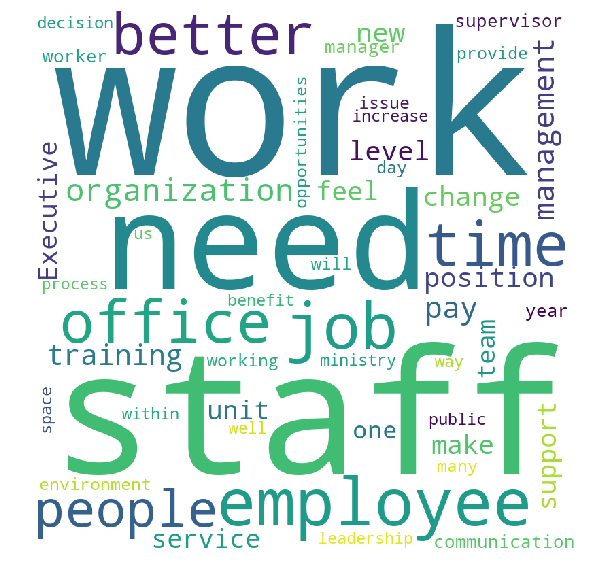

In [115]:
wordcloud = WordCloud(width = 800, 
                      height = 800, 
                      background_color ='white', 
                      stopwords = stopwords, 
                      min_font_size = 10, 
                      max_words=50,
                      collocations=False
                     ).generate(corpus_all) 

plt.figure(figsize = (10, 10)) 
plt.imshow(wordcloud) 
plt.axis("off") 
  
plt.show() 

# n-grams

In [129]:
vect = CountVectorizer(min_df=6, max_features=200, stop_words="english", ngram_range=(2, 4))
term_doc_matrix = vect.fit_transform(df_all["text"])
words = vect.get_feature_names()

word_counts = term_doc_matrix.sum(axis=0)
word_count = []
for i in word_counts.tolist():
    for j in i:
        word_count.append(j) 
        
d = {"words":words, "counts":word_count}
word_freq = pd.DataFrame(d)

word_freq=word_freq.sort_values(by=["counts"], ascending=False)

In [132]:
word_freq.head(50)

,words,counts
194,work unit,514
177,work environment,503
128,public service,459
7,bc public,215
181,work life,197
8,bc public service,197
73,line staff,193
25,cost living,193
70,life balance,186
182,work life balance,179


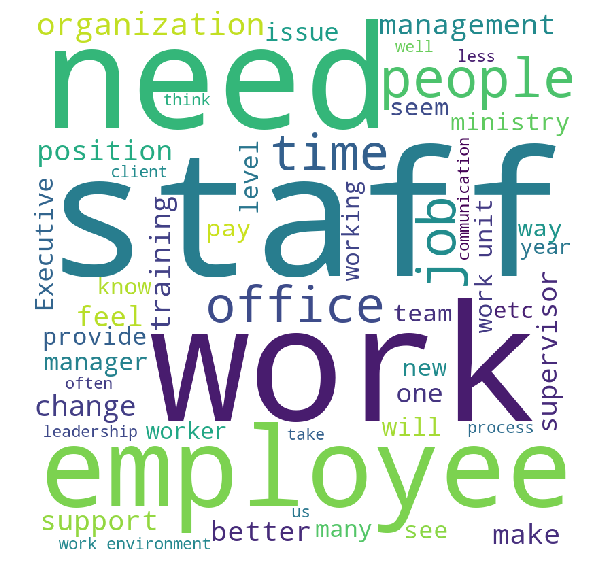

In [118]:
# this does its own tokenization
# not sure if you can pass it your own df
wordcloud = WordCloud(width = 800, 
                      height = 800, 
                      background_color ='white', 
                      stopwords = stopwords, 
                      min_font_size = 10, 
                      max_words=50,
                      collocations=True
                     ).generate(corpus_all) 

plt.figure(figsize = (10, 10)) 
plt.imshow(wordcloud) 
plt.axis("off") 
  
plt.show() 